In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from utils.classifications_utils import *
from utils.data_processing_utils import *
from utils.data_visualization_utils import *
from utils.metrics_utils import *
from utils.grid_search_utils import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_gyro = pd.read_csv("data/gyro_transformed_3_min.csv", index_col=0)
no_wind_transformed = df_gyro[df_gyro["label"]==0]
level_1_transformed = df_gyro[df_gyro["label"]==1]
level_4_transformed = df_gyro[df_gyro["label"]==4]

In [3]:
no_wind_data = load_data(0, 3)
no_wind_data = separate_data_based_on_apparatus(no_wind_data)

level_1_wind = load_data(1, 3)
level_1_wind = separate_data_based_on_apparatus(level_1_wind)

level_8_wind = load_data(8, 3)
level_8_wind = separate_data_based_on_apparatus(level_8_wind)

In [4]:
no_wind_gyro = no_wind_data['gyro']
level_1_wind = level_1_wind['gyro']
level_4_wind = level_8_wind['gyro']

In [5]:
def visualize_each_axis(data, pts_num, wind_level, yLim):
    x = data.iloc[:pts_num, 0]
    y = data.iloc[:pts_num, 1]
    z = data.iloc[:pts_num, 2]
    f = plt.figure(figsize=(15, 3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    ax.set_ylim([-yLim, yLim])
    ax.set_title('Gyro: X axis, ' + wind_level)
    ax.plot([x for x in range(pts_num)], x)
    
    ax2.set_ylim([-yLim, yLim])
    ax2.set_title('Gyro: Y axis, ' + wind_level)
    ax2.plot([x for x in range(pts_num)], y)
    
    ax3.set_ylim([-yLim, yLim])
    ax3.set_title('Gyro: Z axis, ' + wind_level)
    ax3.plot([x for x in range(pts_num)], z)

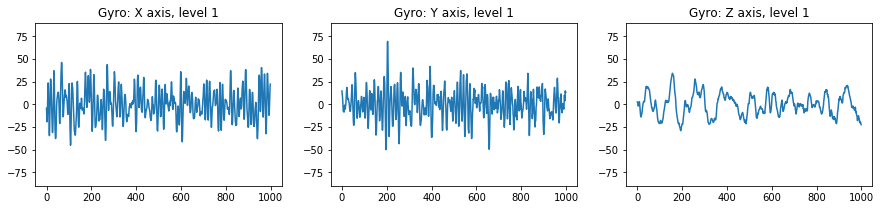

In [6]:
visualize_each_axis(level_1_wind, 1000, "level 1", 90)

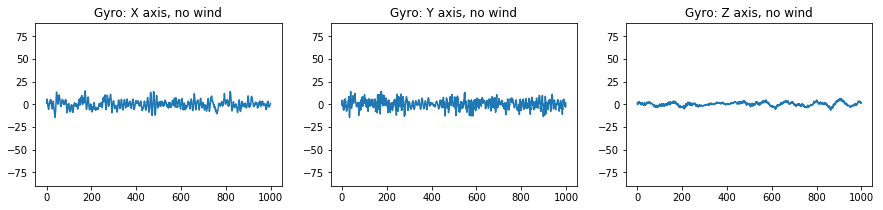

In [7]:
visualize_each_axis(no_wind_gyro, 1000, "no wind", 90)

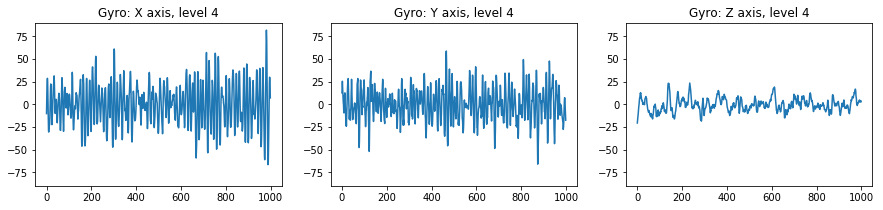

In [8]:
visualize_each_axis(level_4_wind, 1000, "level 4", 90)

In [9]:
def visualize_transformed_data(data, pts_num, wind_level, yLim):
    mu_x = data["mu_x_gyro"]
    mu_y = data["mu_y_gyro"]
    mu_z = data["mu_z_gyro"]
    f = plt.figure(figsize=(15, 3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    ax.set_title('Gyro: Mean X axis, ' + wind_level)
    ax.set_ylim([-yLim, yLim])
    ax.plot([x for x in range(pts_num)], mu_x.iloc[:pts_num])
    
    ax2.set_title('Gyro: Mean Y axis, ' + wind_level)
    ax2.set_ylim([-yLim, yLim])
    ax2.plot([x for x in range(pts_num)], mu_y.iloc[:pts_num])
    
    ax3.set_title('Gyro: Mean Z axis, ' + wind_level)
    ax3.set_ylim([-yLim, yLim])
    ax3.plot([x for x in range(pts_num)], mu_z.iloc[:pts_num])

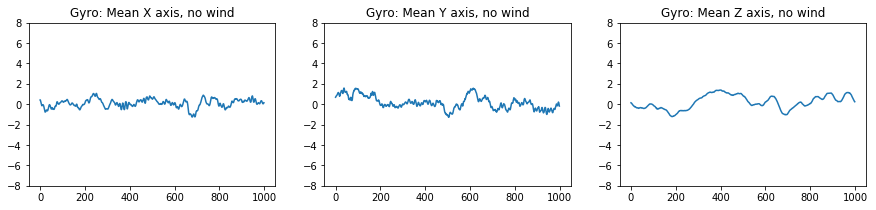

In [10]:
visualize_transformed_data(no_wind_transformed, 1000, "no wind", 8)

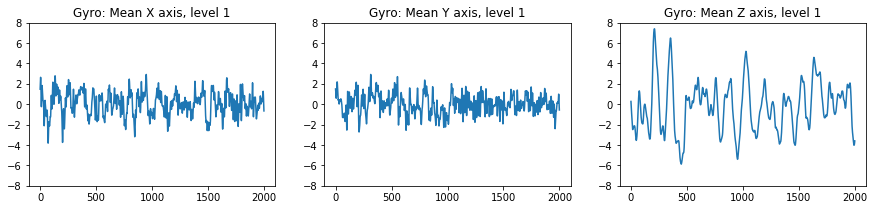

In [11]:
visualize_transformed_data(level_1_transformed, 2000, "level 1", 8)

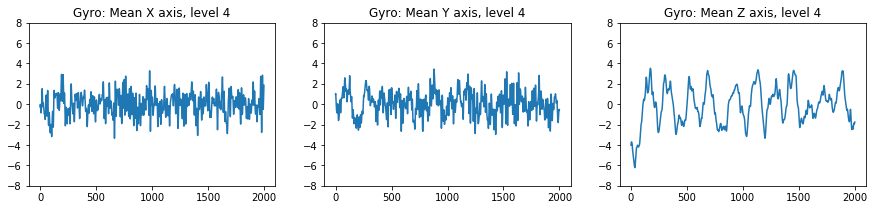

In [12]:
visualize_transformed_data(level_4_transformed, 2000, "level 4", 8)

In [13]:
x = no_wind_gyro.iloc[:, 1]

In [14]:
np.std(x)/10

0.4448896761889908

In [15]:
np.std(no_wind_transformed['mu_y_gyro'])

0.5195420445030362

In [16]:
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

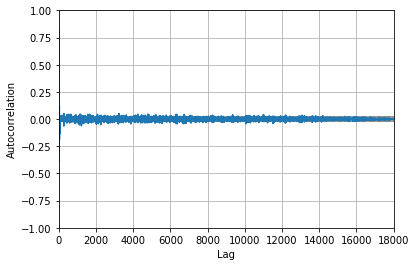

In [17]:
autocorrelation_plot(x)
pyplot.show()

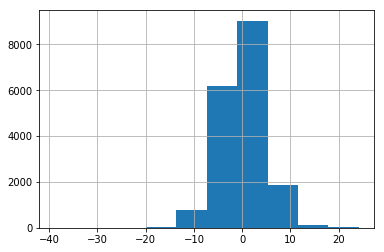

In [18]:
x.hist()
pyplot.show()

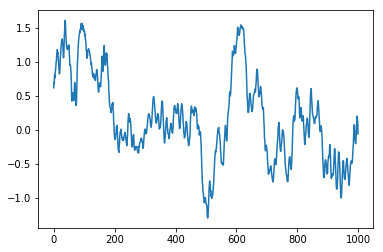

In [19]:
plt.plot([x for x in range(1000)], pd.rolling_mean(x, 99)[98:1098])

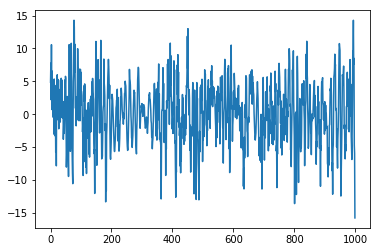

In [20]:
plt.plot([x for x in range(1000)], x[98:1098])

In [23]:
np.fft.fft(x)

array([2254.28451658  +0.j        , -166.0110385   +1.44134617j,
        -73.16236884+255.0345393j , ...,  329.48087585-375.53719971j,
        -73.16236884-255.0345393j , -166.0110385   -1.44134617j])

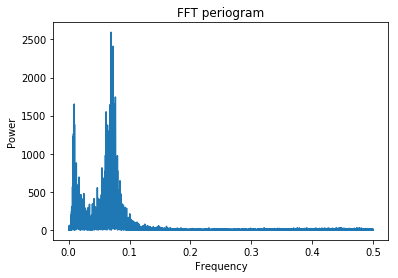

In [35]:
import pyageng
pyageng.pfft(x)